**Importing Required Libraries**

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.applications.mobilenet_v2 import decode_predictions
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

**Paths**

In [2]:
train_path = '/content/drive/MyDrive/Google Scene 2/train'
valid_path = '/content/drive/MyDrive/Google Scene 2/valid'
test_path = '/content/drive/MyDrive/Google Scene 2/test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path, target_size=(224,224), batch_size=10, shuffle=False)


Found 1252 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 165 images belonging to 3 classes.


In [30]:
print(len(train_batches))
print(len(test_batches))

126
17


**Model**

In [4]:
mobile = keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [5]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [6]:
x = mobile.layers[-6].output
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [8]:
for layer in model.layers[:-23]:
  layer.trainable = False

**Train**

In [9]:
model.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
r = model.fit_generator(train_batches, 
                        steps_per_epoch=125,
                        validation_data=valid_batches,
                        validation_steps=8,
                        epochs=10, 
                        verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
125/125 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9952

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


125/125 [==============================] - 103s 826ms/step - loss: 0.0291 - accuracy: 0.9952 - val_loss: 0.2441 - val_accuracy: 0.9500
Epoch 2/10
125/125 [==============================] - 104s 833ms/step - loss: 0.0310 - accuracy: 0.9928 - val_loss: 0.0456 - val_accuracy: 0.9875
Epoch 3/10
125/125 [==============================] - 101s 811ms/step - loss: 0.0351 - accuracy: 0.9879 - val_loss: 0.1066 - val_accuracy: 0.9875
Epoch 4/10
125/125 [==============================] - 101s 806ms/step - loss: 0.0381 - accuracy: 0.9887 - val_loss: 0.1321 - val_accuracy: 0.9375
Epoch 5/10
125/125 [==============================] - 101s 806ms/step - loss: 0.0290 - accuracy: 0.9944 - val_loss: 0.1419 - val_accuracy: 0.9750
Epoch 6/10
125/125 [==============================] - 103s 826ms/step - loss: 0.0367 - accuracy: 0.9903 - val_loss: 0.1477 - val_accuracy: 0.9625
Epoch 7/10
125/125 [==============================] - 101s 803ms/step - loss: 0.0287 - accuracy: 0.9895 - val_loss: 0.0278 - val_accura

**Predictions**

In [33]:
test_labels = test_batches.classes
len(test_labels)

165

In [34]:
predictions = model.predict_generator(test_batches, steps=113, verbose=0)
len(predictions)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


165

In [35]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [36]:
for i in rounded_predictions:
  print(i)

0
0
0
0
0
0
0
0
0
0
0
2
0
0
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


**Confusion Matrix**

In [37]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [38]:
test_batches.class_indices

{'bedroom': 0, 'diningroom': 1, 'livingroom': 2}

In [39]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[51  0  4]
 [ 0 52  3]
 [ 2  1 52]]


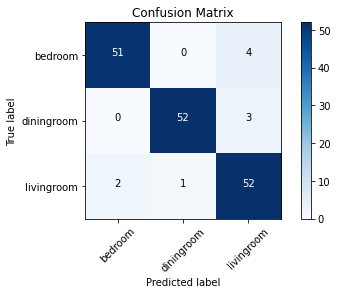

In [40]:
cm_plot_labels = ['bedroom', 'diningroom', 'livingroom']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

**Learning Curves**

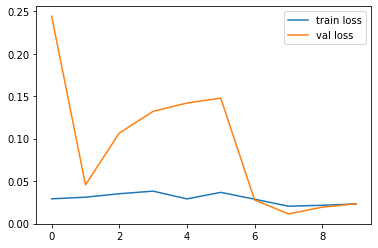

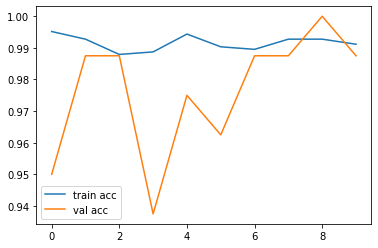

<Figure size 432x288 with 0 Axes>

In [42]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [56]:
img_width, img_height = 224, 224
img = image.load_img('/content/drive/MyDrive/indoor/train/Diningroom/dining_room11.jpg', target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

model.predict(img)

array([[0.01002354, 0.8774386 , 0.11253791]], dtype=float32)

**Saving**

In [57]:
from tensorflow.keras.models import load_model

model.save('room_scenes(ssd).h5')

**Converting to TFlite**

In [59]:
import tensorflow as tf

tflite_model = tf.keras.models.load_model('/content/room_scenes(ssd).h5')
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
tflite_save = converter.convert()
open("rooms_scenes.tflite", "wb").write(tflite_save)

INFO:tensorflow:Assets written to: /tmp/tmpasnldac0/assets


12812044